
# Step 1: Generate noisy data for the Lotka–Volterra identification exercise

This notebook generates noisy synthetic data from the Lotka–Volterra predator-prey model.  
You will use this data in future exercises on data assimilation using finite differences and adjoint methods.


In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Configure plots
plt.rc('text', usetex=False) # latex is better, but only on a local machine.
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)



## Model Equations

The system is defined by:

\begin{align}
\frac{ds_1}{dt} &= a s_1 - b s_1 s_2 \\\\
\frac{ds_2}{dt} &= -c s_2 + d s_1 s_2
\end{align}

Where:
- \(s_1(t)\): Prey population  
- \(s_2(t)\): Predator population  
- \(a, b, c, d\): System parameters  


In [2]:
# Define true parameters and initial condition
a, b, c, d = 1.0, 1.0, 3.0, 1.0
p_star = np.array([a, b, c, d])
s0 = [10, 5]  # Initial state [s1, s2]

# Time domain
t0, tf = 0.0, 15.0
t = np.linspace(t0, tf, 1000)

# Define the system
def lotka_volterra(t, s, a=1.0, b=1.0, c=3.0, d=1.0):
    s_1, s_2 = s
    ds1_dt = a * s_1 - b * s_1 * s_2
    ds2_dt = -c * s_2 + d * s_1 * s_2
    return [ds1_dt, ds2_dt]


In [5]:
sol = solve_ivp(
    fun=lotka_volterra,
    t_span=[t0, tf],
    y0=s0,
    t_eval=t,
    args=(a, b, c, d),
    method='RK45',
    dense_output=True   # <-- Required to enable sol.sol(t)
)


s_clean = sol.sol(t)  # s_clean[0, :] = s1(t), s_clean[1, :] = s2(t)
noise_amplitude = 0.5
np.random.seed(42)
s_noisy = s_clean + noise_amplitude * np.random.rand(*s_clean.shape)


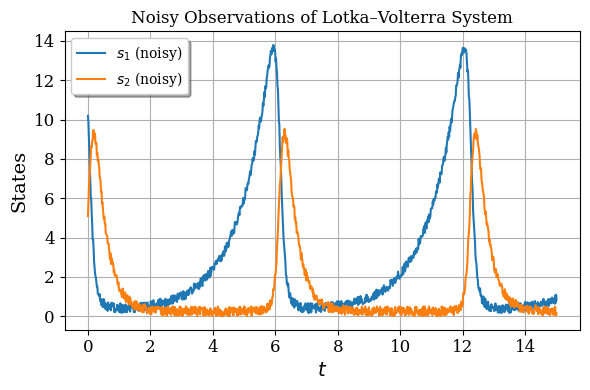

In [7]:
# Plot s1(t) and s2(t)
fig, ax = plt.subplots(figsize=(6, 4))
plt.plot(t, s_noisy[0,:], label='$s_1$ (noisy)')
plt.plot(t, s_noisy[1,:], label='$s_2$ (noisy)')
plt.xlabel('$t$', fontsize=14)
plt.ylabel('States', fontsize=14)
plt.legend(shadow=True)
plt.title('Noisy Observations of Lotka–Volterra System')
plt.grid(True)
plt.tight_layout()
plt.show()


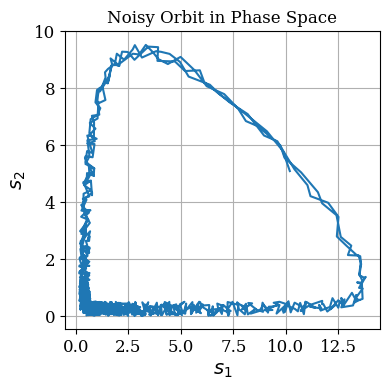

In [8]:
# Plot s2 vs. s1
fig, ax = plt.subplots(figsize=(4, 4))
plt.plot(s_noisy[0], s_noisy[1])
plt.xlabel('$s_1$', fontsize=14)
plt.ylabel('$s_2$', fontsize=14)
plt.title('Noisy Orbit in Phase Space')
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
# Save data to file


from google.colab import drive
drive.mount('/content/drive')

# Save file to a shared folder in your Drive
np.savez('/content/drive/MyDrive/data_exercise_adjoint_ULB.npz', t=t, s_noisy=s_noisy)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
